### Import Libraries

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [314]:
df = pd.read_csv(r"C:\Users\DIVYA\Downloads\archive (9).zip")

In [315]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### EDA & Data Preprocessing

In [316]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [317]:
df.shape

(374, 13)

In [318]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [320]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [321]:
df.dropna(inplace=True)

In [322]:
df.duplicated().sum()

0

In [323]:
df.drop(['Person ID'], axis = 1, inplace = True)

In [324]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [325]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [326]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [327]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [328]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()

In [329]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [330]:
df['BMI Category'] = lbl_en.fit_transform(df['BMI Category'])

In [331]:
df['BMI Category'].unique()

array([3, 0, 2, 1])

<AxesSubplot:xlabel='Sleep Disorder', ylabel='count'>

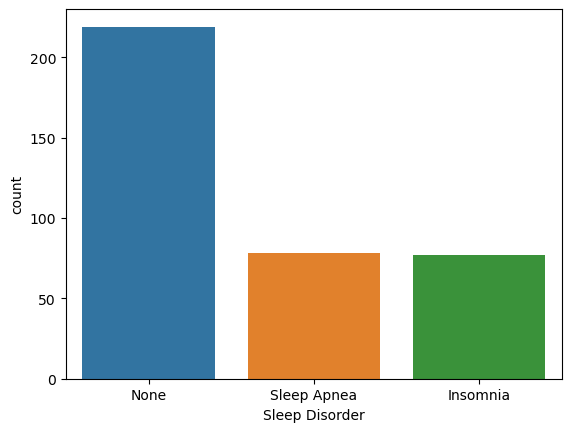

In [332]:
sns.countplot(data=df, x='Sleep Disorder')

<AxesSubplot:xlabel='Quality of Sleep', ylabel='count'>

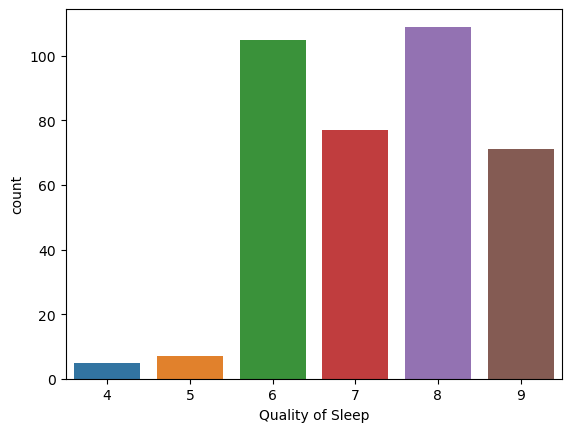

In [333]:
sns.countplot(data=df, x='Quality of Sleep')

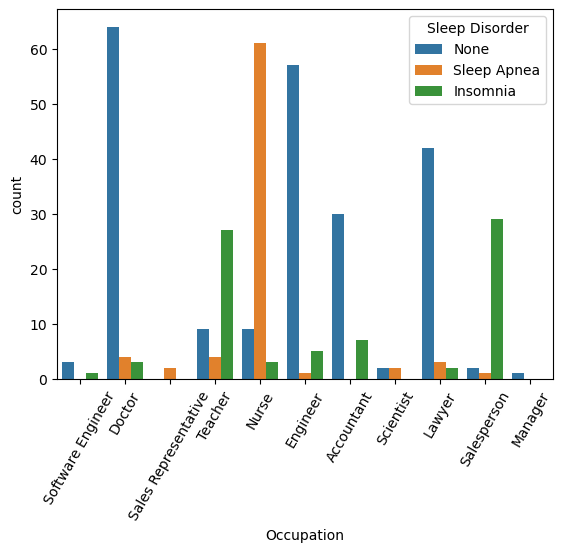

In [334]:
sns.countplot( data=df, x= 'Occupation', hue = 'Sleep Disorder')
plt.xticks(rotation=60)
plt.show()

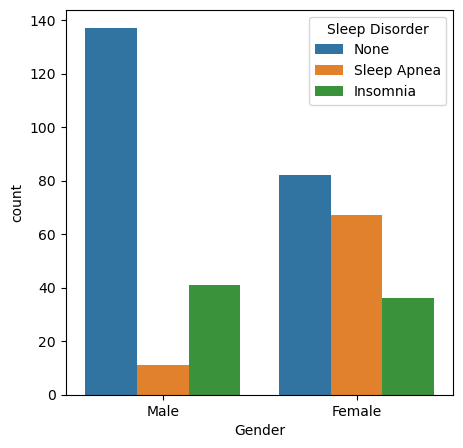

In [335]:
plt.figure(figsize=(5,5), dpi=100)
sns.countplot(data = df, x='Gender', hue = 'Sleep Disorder')
plt.show()

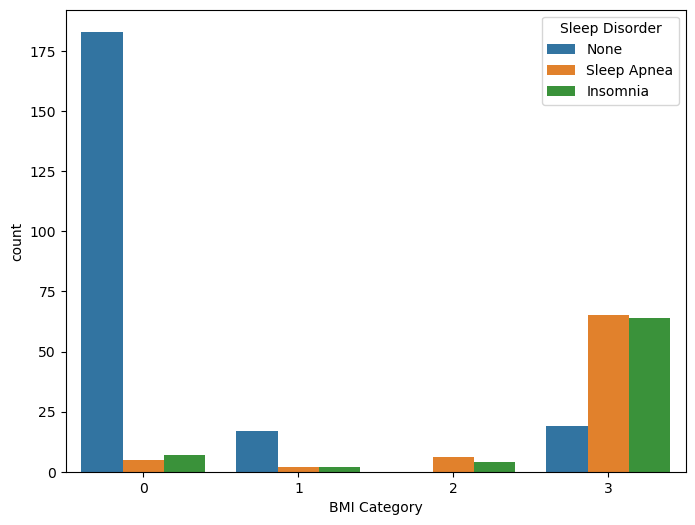

In [336]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data = df, x='BMI Category', hue = 'Sleep Disorder')
plt.show()

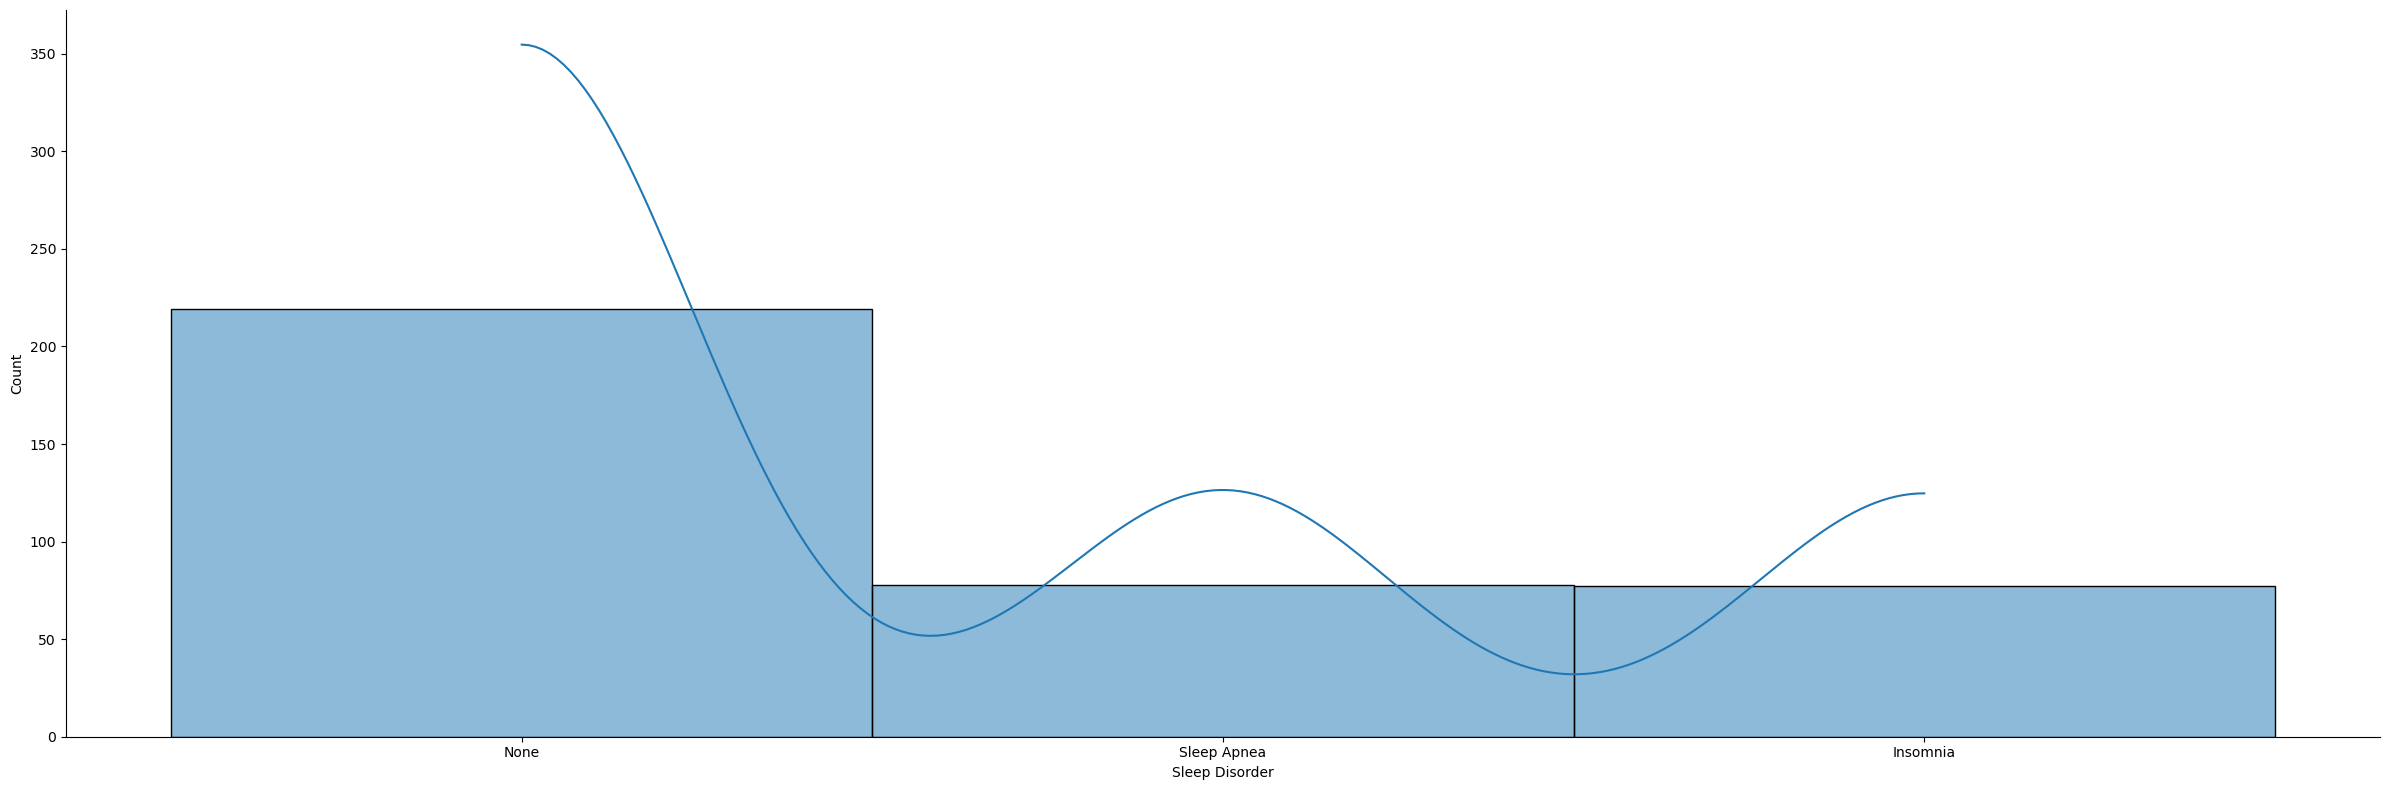

In [337]:
sns.displot(data=df,x="Sleep Disorder",height=8,aspect=3,kde=True)

<AxesSubplot:xlabel='Quality of Sleep', ylabel='Stress Level'>

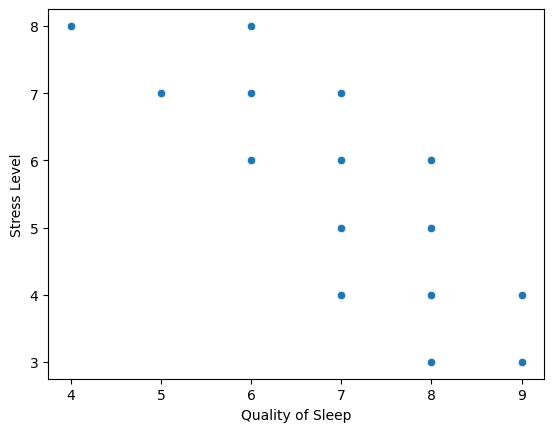

In [338]:
sns.scatterplot(data=df,y="Stress Level",x="Quality of Sleep")

<AxesSubplot:xlabel='Quality of Sleep', ylabel='Sleep Disorder'>

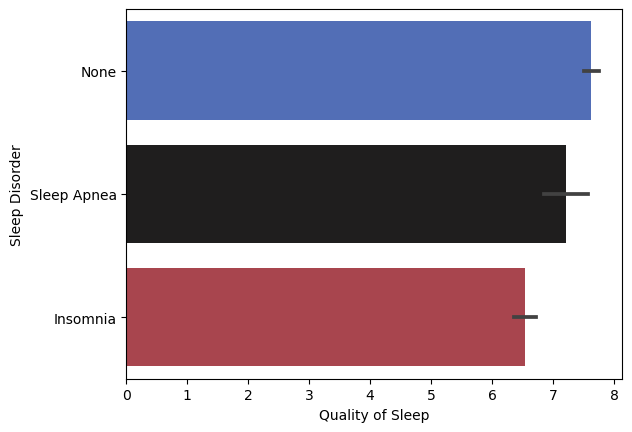

In [339]:
sns.barplot(y='Sleep Disorder',x='Quality of Sleep',palette='icefire',data=df)

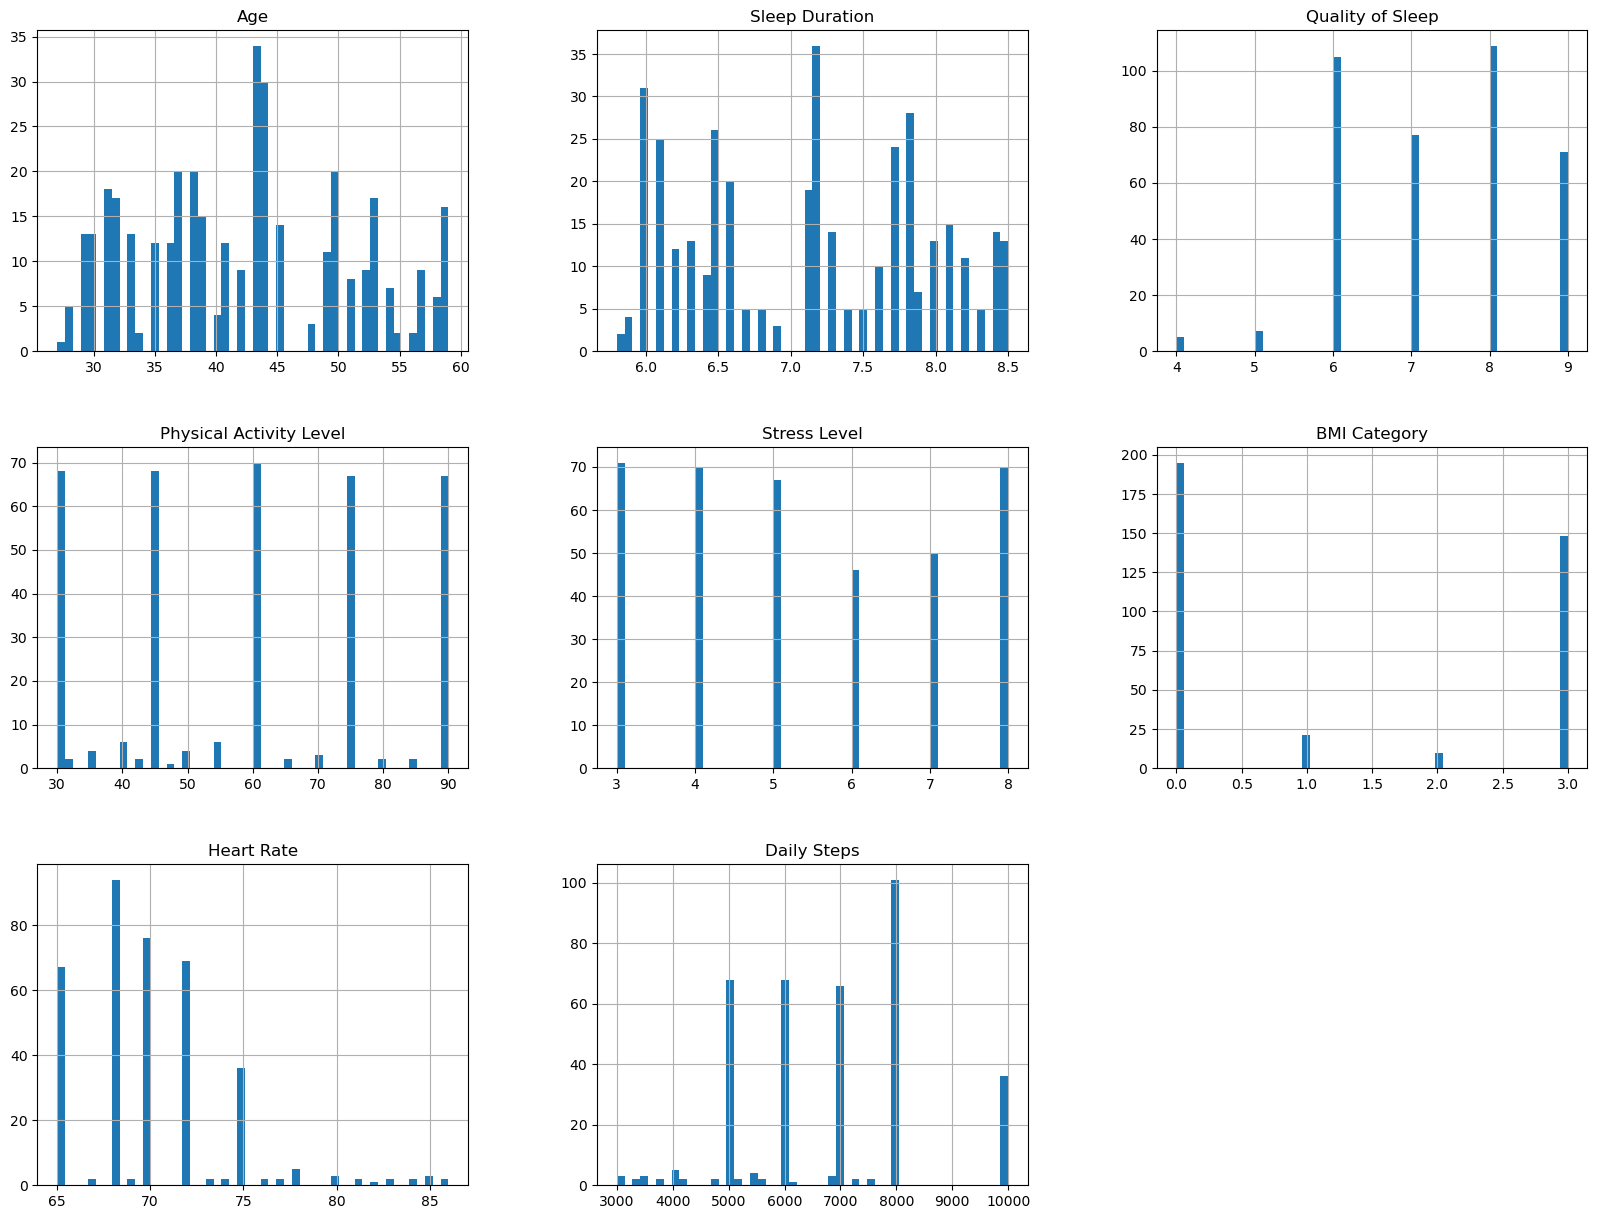

In [340]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Age'>

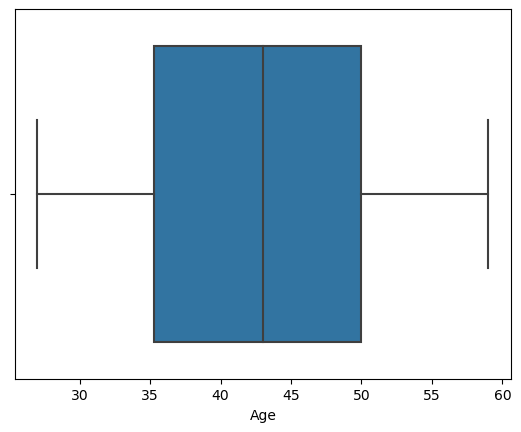

In [341]:
sns.boxplot(data=df, x='Age')

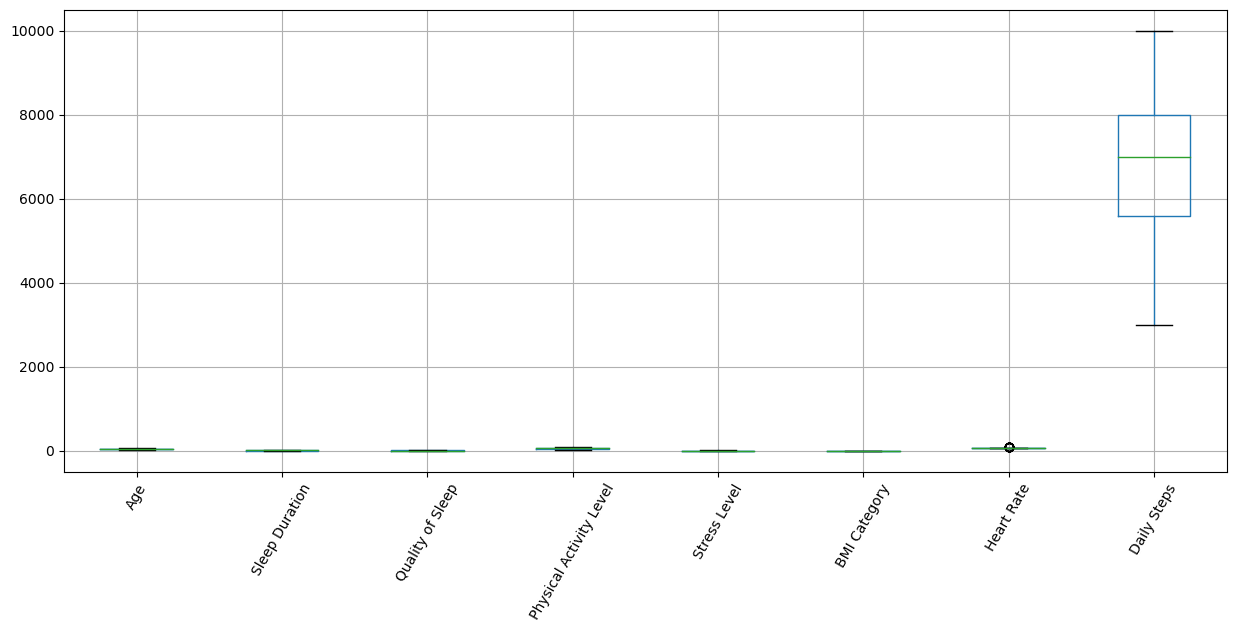

In [342]:
df.boxplot( figsize=(15,6))
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:xlabel='Heart Rate'>

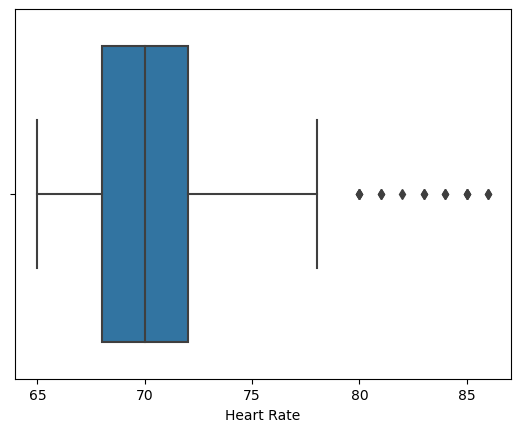

In [343]:
sns.boxplot(data=df, x='Heart Rate')

In [344]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int32
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

#### Correlation

<AxesSubplot:>

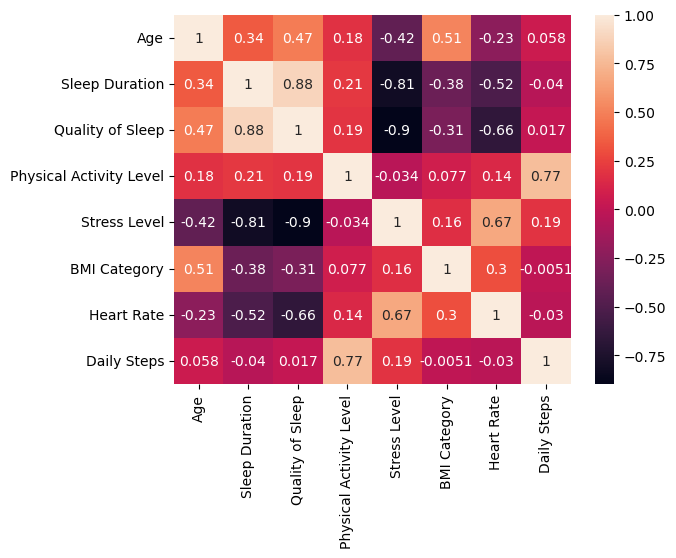

In [345]:
sns.heatmap(df.corr(),annot=True)

In [346]:
df.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,0.511329,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.376358,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.312562,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.077156,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.163895,0.670026,0.186829
BMI Category,0.511329,-0.376358,-0.312562,0.077156,0.163895,1.000000,0.295585,-0.005059
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,0.295585,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.005059,-0.030309,1.000000


In [347]:
## df['Sleep Disorder'] = df['Sleep Disorder'].apply(lambda x : 0 if x=='None' else(1 if x=='Sleep Apnea' else 2))

In [348]:
df['Sleep Disorder'] = df['Sleep Disorder'].apply(lambda x : 0 if x=='None' else 1 )

In [349]:
from scipy.stats import zscore

In [350]:
zscore(df['Heart Rate'])

0      1.654719
1      1.170474
2      1.170474
3      3.591698
4      3.591698
         ...   
369   -0.524383
370   -0.524383
371   -0.524383
372   -0.524383
373   -0.524383
Name: Heart Rate, Length: 374, dtype: float64

In [351]:
df[(zscore(df['Heart Rate'] )>3) | (zscore(df['Heart Rate'])<-3)]['Heart Rate']

3      85
4      85
5      85
93     84
145    84
264    83
266    83
276    86
277    86
Name: Heart Rate, dtype: int64

In [352]:
df1  = pd.get_dummies(df, drop_first =True)
df1

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,27,6.1,6,42,6,3,77,4200,0,1,...,0,0,0,0,0,0,0,0,0,0
1,28,6.2,6,60,8,0,75,10000,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28,6.2,6,60,8,0,75,10000,0,1,...,0,0,0,0,0,0,0,0,0,0
3,28,5.9,4,30,8,2,85,3000,1,1,...,0,0,0,0,0,0,0,1,0,0
4,28,5.9,4,30,8,2,85,3000,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,3,68,7000,1,0,...,0,0,0,0,0,0,0,0,1,0
370,59,8.0,9,75,3,3,68,7000,1,0,...,0,0,0,0,0,0,0,0,1,0
371,59,8.1,9,75,3,3,68,7000,1,0,...,0,0,0,0,0,0,0,0,1,0
372,59,8.1,9,75,3,3,68,7000,1,0,...,0,0,0,0,0,0,0,0,1,0


In [353]:
# Declare X & Y 

In [354]:
x = df1.drop('Sleep Disorder', axis=1)
y = df1['Sleep Disorder']

In [355]:
x.shape

(374, 43)

In [356]:
from imblearn.combine import SMOTETomek

In [357]:
smpl = SMOTETomek()

In [358]:
#Data splitting into training & testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [359]:
x_train_os, y_train_os = smpl.fit_resample(x_train, y_train)

In [360]:
y_train_os.value_counts()

0    157
1    157
Name: Sleep Disorder, dtype: int64

In [361]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

transform = ColumnTransformer(transformers=[
    ('c1', StandardScaler(),['Age']),
    ('c2',StandardScaler(),['Sleep Duration']),
    ('c3',StandardScaler(),['Quality of Sleep']),
    ('c4',StandardScaler(),['Physical Activity Level']),
    ('c5',StandardScaler(),['Stress Level']),
    ('c6',StandardScaler(),['BMI Category']),
    ('c7',StandardScaler(),['Daily Steps']),
    ('c8', RobustScaler(),['Heart Rate'])
],remainder = 'passthrough')

In [362]:
x_train_scl = transform.fit_transform(x_train_os) 
x_test_scl = transform.fit_transform(x_test)

### Logistic Regression

In [363]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [364]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score

In [365]:
lor_mdl = lor.fit(x_train_scl, y_train_os)
lor_mdl

LogisticRegression()

In [366]:
lor_y_pred = lor.predict(x_test_scl)
lor_y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [367]:
lor_accuracy = accuracy_score(lor_y_pred, y_test)
lor_accuracy

0.9380530973451328

In [368]:
cm = confusion_matrix(lor_y_pred, y_test)
cm

array([[59,  4],
       [ 3, 47]], dtype=int64)

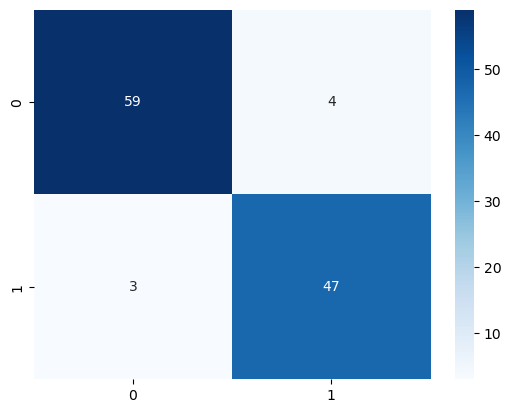

In [369]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [370]:
report = classification_report(lor_y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.92      0.94      0.93        50

    accuracy                           0.94       113
   macro avg       0.94      0.94      0.94       113
weighted avg       0.94      0.94      0.94       113



In [371]:
fpr, tpr, _ = roc_curve(lor_y_pred, y_test)
fpr, tpr, _

(array([0.        , 0.06349206, 1.        ]),
 array([0.  , 0.94, 1.  ]),
 array([2, 1, 0], dtype=int64))

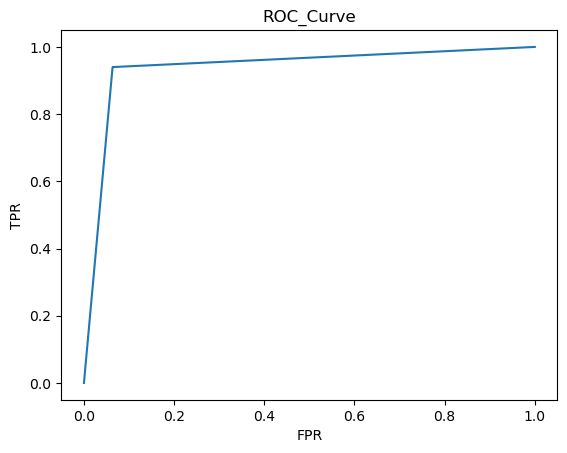

In [372]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Curve')
plt.show()

### Decision Tree

In [373]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [374]:
dt_mdl = dt.fit(x_train_scl, y_train_os)
dt_mdl

DecisionTreeClassifier()

In [375]:
dt_y_pred = dt.predict(x_test_scl)
dt_y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [376]:
dt_accuracy = accuracy_score(dt_y_pred, y_test)
dt_accuracy

0.831858407079646

In [377]:
cm=confusion_matrix(dt_y_pred, y_test)
cm

array([[52,  9],
       [10, 42]], dtype=int64)

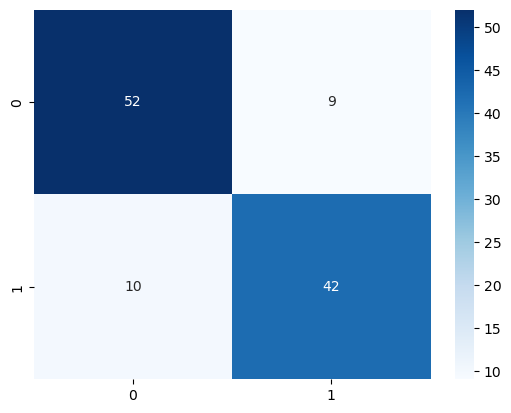

In [378]:
sns.heatmap(cm, annot = True, cmap='Blues' )
plt.show()

In [379]:
print(classification_report(dt_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        61
           1       0.82      0.81      0.82        52

    accuracy                           0.83       113
   macro avg       0.83      0.83      0.83       113
weighted avg       0.83      0.83      0.83       113



In [380]:
fpr, tpr, _ = roc_curve(dt_y_pred, y_test)
fpr, tpr, _

(array([0.        , 0.14754098, 1.        ]),
 array([0.        , 0.80769231, 1.        ]),
 array([2, 1, 0], dtype=int64))

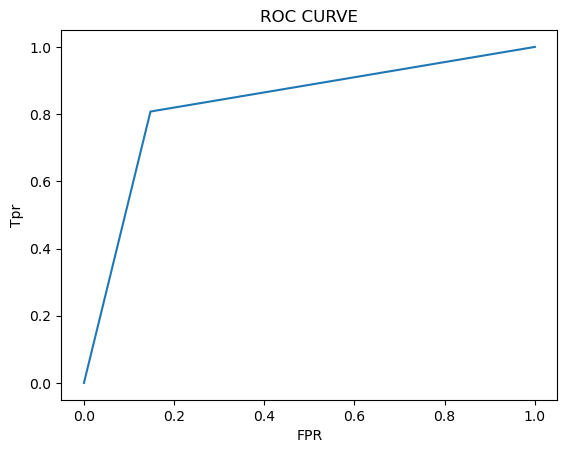

In [381]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('Tpr')
plt.title('ROC CURVE')
plt.show()

#### Hyperparameter tunning

In [382]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tun_data = [{'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'min_samples_split': range(1, 30)}]
gs = GridSearchCV(DecisionTreeClassifier(), tun_data, scoring='accuracy', cv=10)
gs.fit(x_train_scl, y_train_os)

C:\Users\DIVYA\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 5220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DIVYA\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DIVYA\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\DIVYA\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'min_samples_split': range(1, 30)}],
             scoring='accuracy')

In [383]:
gs.best_score_

0.9045362903225806

### Random Forest

In [384]:
from sklearn.ensemble import RandomForestClassifier

In [385]:
rf = RandomForestClassifier(n_estimators = 200, criterion='gini', max_depth=4, min_samples_split=13 )

In [386]:
rf_mdl = rf.fit(x_train_scl, y_train_os)

In [387]:
rf_y_pred = rf_mdl.predict(x_test_scl)

In [388]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_accuracy

0.9380530973451328

In [389]:
cm = confusion_matrix(y_test,rf_y_pred)
cm

array([[59,  3],
       [ 4, 47]], dtype=int64)

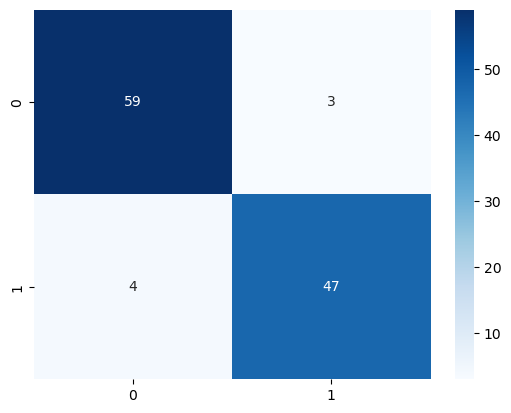

In [390]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [391]:
fpr, tpr, _= roc_curve(y_test, rf_y_pred)
fpr, tpr, _

(array([0.       , 0.0483871, 1.       ]),
 array([0.        , 0.92156863, 1.        ]),
 array([2, 1, 0], dtype=int64))

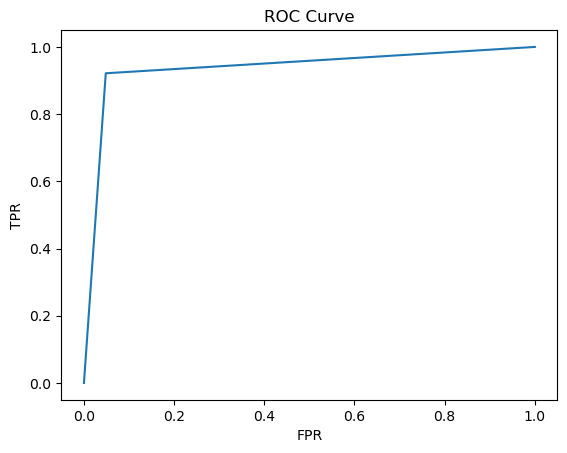

In [392]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [393]:
# hyper parametric tunning

In [394]:
rf_tun = [{'min_samples_split': range(5,20), 'n_estimators':range(1,10), 'max_depth':[5,10,15]}]
gs_rf = GridSearchCV(RandomForestClassifier(), rf_tun,cv=10, scoring = 'accuracy')
gs_rf.fit(x_train_scl,y_train_os)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': range(5, 20),
                          'n_estimators': range(1, 10)}],
             scoring='accuracy')

In [395]:
gs_rf.best_score_

0.9202620967741935

### SVM 

In [396]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', C = 0.1)
svm_mdl = svm.fit(x_train_scl, y_train_os)

In [397]:
svm_y_pred = svm_mdl.predict(x_test_scl)
svm_y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [398]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_accuracy

0.9469026548672567

In [399]:
cm = confusion_matrix(y_test, svm_y_pred)
cm

array([[60,  2],
       [ 4, 47]], dtype=int64)

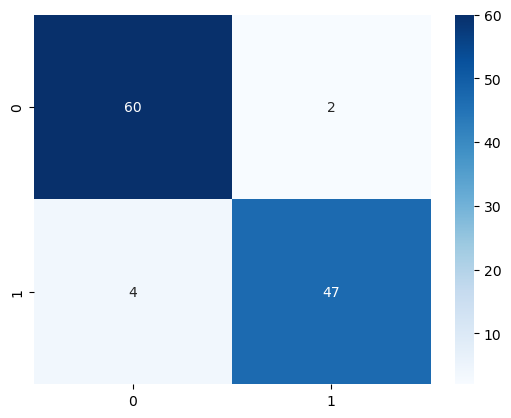

In [400]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [401]:
report = classification_report(y_test, svm_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        62
           1       0.96      0.92      0.94        51

    accuracy                           0.95       113
   macro avg       0.95      0.94      0.95       113
weighted avg       0.95      0.95      0.95       113



In [402]:
fpr,tpr,_ = roc_curve(y_test,svm_y_pred)
fpr,tpr,_

(array([0.        , 0.03225806, 1.        ]),
 array([0.        , 0.92156863, 1.        ]),
 array([2, 1, 0], dtype=int64))

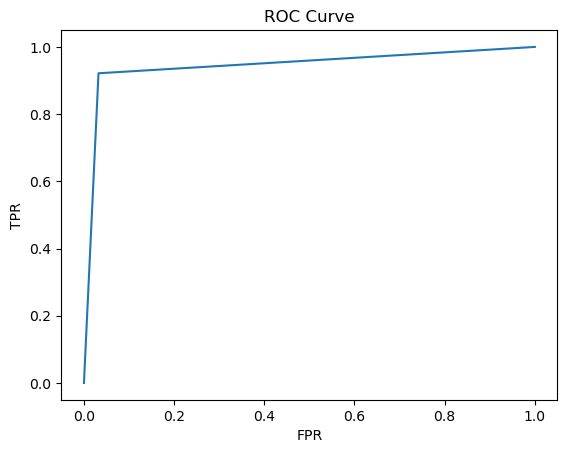

In [403]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

### KNN

In [404]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')


In [405]:
knn_mdl = knn.fit(x_train_scl, y_train_os)

In [406]:
knn_y_pred = knn_mdl.predict(x_test_scl)
knn_y_pred

C:\Users\DIVYA\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [407]:
knn_accuracy = accuracy_score(y_test,knn_y_pred)
knn_accuracy

0.9557522123893806

In [408]:
cm = confusion_matrix(y_test,knn_y_pred)
cm

array([[61,  1],
       [ 4, 47]], dtype=int64)

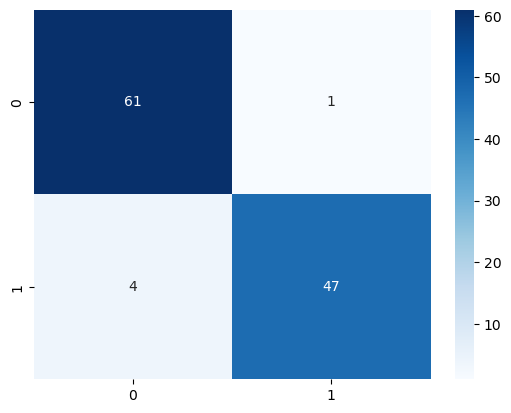

In [409]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [410]:
report = classification_report(y_test,knn_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.98      0.92      0.95        51

    accuracy                           0.96       113
   macro avg       0.96      0.95      0.96       113
weighted avg       0.96      0.96      0.96       113



In [411]:
fpr, tpr, _ = roc_curve(y_test,knn_y_pred)
fpr, tpr, 

(array([0.        , 0.01612903, 1.        ]),
 array([0.        , 0.92156863, 1.        ]))

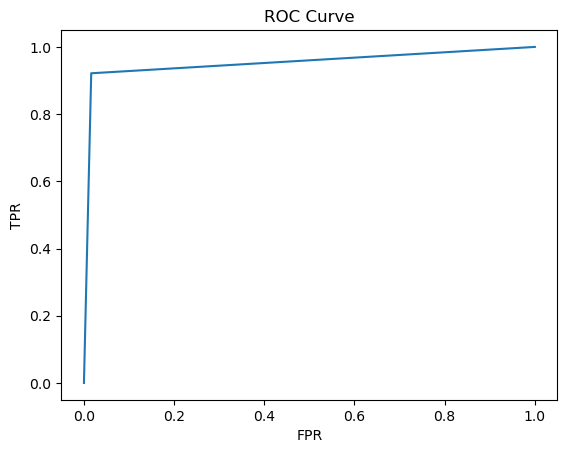

In [412]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

### Accuracy of all Algorithms

In [413]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "Tune Decision Tree",
              "Random Forest",
              "Tune Random Forest",
              "SVM",
              "KNN"],
    "Accuracy score": [lor_accuracy, dt_accuracy, gs.best_score_, rf_accuracy, gs_rf.best_score_,
                       svm_accuracy, knn_accuracy]
})

print(models)

                 Model  Accuracy score
0  Logistic Regression        0.938053
1        Decision Tree        0.831858
2   Tune Decision Tree        0.904536
3        Random Forest        0.938053
4   Tune Random Forest        0.920262
5                  SVM        0.946903
6                  KNN        0.955752


In [414]:
models.sort_values(by="Accuracy score",ascending= False)

,Model,Accuracy score
6,KNN,0.955752
5,SVM,0.946903
0,Logistic Regression,0.938053
3,Random Forest,0.938053
4,Tune Random Forest,0.920262
2,Tune Decision Tree,0.904536
1,Decision Tree,0.831858
